<a href="https://colab.research.google.com/github/marounna/cloud/blob/main/ex_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

drive/  sample_data/


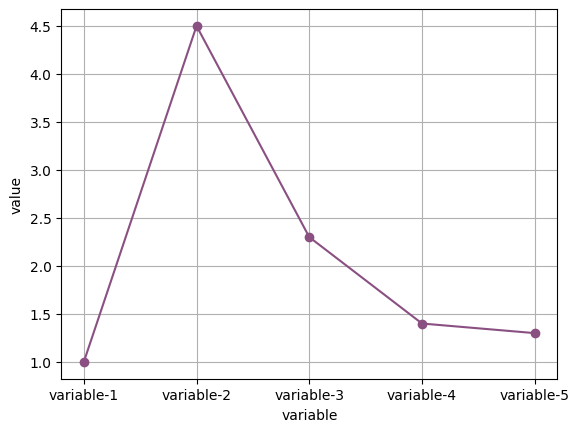

In [ ]:
import matplotlib.pyplot as plt
import json
dictionary = json.load(open('1.json', 'r'))
xAxis = [key for key, value in dictionary.items()]
yAxis = [value for key, value in dictionary.items()]
plt.grid(True)
## LINE GRAPH ##
plt.plot(xAxis,yAxis, color='#8a5082', marker='o')
plt.xlabel('variable')
plt.ylabel("value")

plt.show()

In [ ]:
## BAR GRAPH ##
fig = plt.figure()
# List of colors for each bar
colors = ['#84CFB3', '#3CA2C3', '#6FF88B', '#7350F6', '#ADF3FD']

plt.bar(xAxis,yAxis, color=colors)
plt.title('Bar Graph')
plt.xlabel('variable')
plt.ylabel('value')
plt.show()


In [ ]:
import pandas as pd
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories)
print(myvar)


In [ ]:
import pandas
mydataset = {
 'cars': ["BMW", "Volvo", "Ford"],
 'passings': [3, 7, 2]
}
myvar = pandas.DataFrame(mydataset)
print(myvar)


In [ ]:
import pandas as pd
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)
print(myvar[0])


In [ ]:
import pandas as pd
data = {
"calories": [420, 380, 390],
 "duration": [50, 40, 45]
}
myvar2 = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(myvar2)


In [ ]:
import pandas as pd
data = {
 "calories": [420, 380, 390],
 "duration": [50, 40, 45]
}
df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(df)
#refer to the named index:
print(df.loc["day2"])


In [ ]:
ls

In [ ]:
list1 = json.load(open('data.json', 'r'))
print(list1)

In [ ]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the data from the JSON file
with open('data.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a pandas DataFrame
df = pd.DataFrame(data)

# Convert the 'Time' column to datetime without time
df['Time'] = pd.to_datetime(df['Time']).dt.date

def filter_data(df, date_range=None, document=None, tab=None, user=None, description=None):
    if date_range:
        start_date, end_date = date_range
        df = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

    if document:
        df = df[df['Document'] == document]

    if tab:
        df = df[df['Tab'] == tab]

    if user:
        df = df[df['User'] == user]

    if description:
        df = df[df['Description'].str.contains(description, case=False, na=False)]

    return df

def input_filter_criteria():
    print("Enter the filter criteria (leave blank to skip):")

    start_date = input("Start Date (YYYY-MM-DD): ")
    end_date = input("End Date (YYYY-MM-DD): ")

    date_range = None
    if start_date and end_date:
        try:
            start_date = datetime.strptime(start_date, '%Y-%m-%d').date()
            end_date = datetime.strptime(end_date, '%Y-%m-%d').date()
            date_range = (start_date, end_date)
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD")
            return

    document = input("Document: ")
    tab = input("Tab: ")
    user = input("User: ")
    description = input("Description: ")

    return date_range, document, tab, user, description

def display_results(results):
    if results.empty:
        print("No results found.")
    else:
        print(results)
        choose_chart(results)

def choose_chart(results):
    print("Choose a chart type:")
    print("1. Bar Chart")
    print("2. Line Chart")
    print("3. Pie Chart")
    print("4. Scatter Plot")

    choice = input("Enter the number of your choice: ")

    if choice == '1':
        plot_bar_chart(results)
    elif choice == '2':
        plot_line_chart(results)
    elif choice == '3':
        plot_pie_chart(results)
    elif choice == '4':
        plot_scatter_plot(results)
    else:
        print("Invalid choice. Please choose a valid chart type.")

def plot_bar_chart(results):
    counts = results['Time'].value_counts().sort_index()
    counts.plot(kind='bar', figsize=(10, 5))
    plt.title('Number of Entries per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Entries')
    plt.show()

def plot_line_chart(results):
    counts = results['Time'].value_counts().sort_index()
    counts.plot(kind='line', figsize=(10, 5))
    plt.title('Number of Entries per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Entries')
    plt.show()

def plot_pie_chart(results):
    counts = results['Document'].value_counts()
    counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
    plt.title('Distribution of Documents')
    plt.ylabel('')
    plt.show()

def plot_scatter_plot(results):
    if 'Value' in results.columns:
        plt.scatter(results['Time'], results['Value'])
        plt.title('Scatter Plot of Values over Time')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.show()
    else:
        print("No 'Value' column in data to plot scatter plot.")

# Get filter criteria from user
date_range, document, tab, user, description = input_filter_criteria()

# Filter the data
filtered_results = filter_data(df, date_range, document, tab, user, description)

# Display the results and the chart
display_results(filtered_results)
